# <u>TP1 - Trajectoire d'un modèle à n étapes</u>

In [23]:
import numpy as np

n = 100 # nombre d'étapes
T = 1 # temps final
δt = T/n # pas de temps
S0 = 80 # prix initial
σ = 0.1 # volatilité
up = np.exp(σ*np.sqrt(δt))
down = 1/up

print("σ = {}, u = {}, down = {}".format(σ,up,down))

σ = 0.1, u = 1.010050167084168, down = 0.9900498337491681


In [24]:
# matrice des prix de l'actif
def CRR(n,down,up,S0):
    S = np.zeros((n+1,n+1))
    S[0,0] = S0
    for i in range(n):
        S[i+1,0] = S[i,0]*down
        for j in range(i+1):
            S[i+1,j+1] = S[i,j]*up
    return S


In [25]:
S = CRR(n,down,up,S0)
S

array([[ 80.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 79.2039867 ,  80.80401337,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 78.41589386,  80.        ,  81.6161072 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 30.02488791,  30.63143088,  31.25022683, ..., 213.15649935,
          0.        ,   0.        ],
       [ 29.72613528,  30.32664305,  30.93928188, ..., 211.03555675,
        215.29875779,   0.        ],
       [ 29.43035529,  30.02488791,  30.63143088, ..., 208.93571787,
        213.15649935, 217.46254628]])

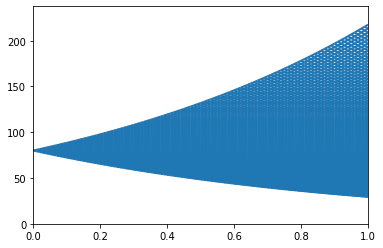

In [26]:
# librairies graphiques
import matplotlib.pyplot as plt
import matplotlib.collections as mc

# liste des couples de points
lines = []
for i in range(n):
    for j in range(i+1):
        lines.append([(i*δt,S[i,j]),((i+1)*δt,S[i+1,j])])
        lines.append([(i*δt,S[i,j]),((i+1)*δt,S[i+1,j+1])])

# plot
lc = mc.LineCollection(lines, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,T)
ax.set_ylim(0,S.max()+20)
ax.add_collection(lc)
plt.show()

In [27]:
# trajectoires aléatoires sur cet arbre
M = 100 # nb de trajectoires
p = 0.6 # paramètre Bernoulli
A = np.random.binomial(1,p,(n,M)) # tirages aléatoires de M trajectoires de n étapes
J = np.cumsum(A,axis=0) # nombre de up cumulatif
P = np.zeros((n+1,M)) # matrice des prix correspondants
for m in range(M):
    P[0,m] = S0
    for i in range(n):
        P[i+1,m] = S[i+1,J[i,m]]

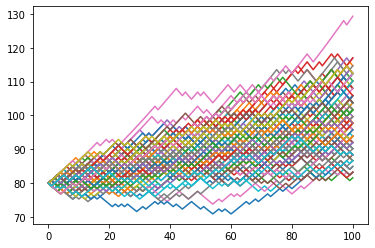

In [28]:
plt.plot(P)
plt.show()

(array([ 7., 12., 19., 18., 17., 14., 10.,  2.,  0.,  1.]),
 array([ 81.6161072 ,  86.3830917 ,  91.1500762 ,  95.91706069,
        100.68404519, 105.45102969, 110.21801419, 114.98499868,
        119.75198318, 124.51896768, 129.28595218]),
 <BarContainer object of 10 artists>)

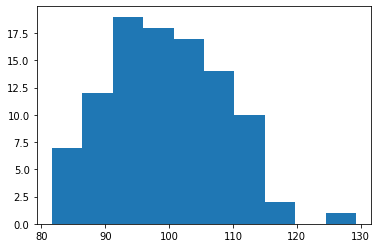

In [29]:
# histogramme des prix finaux
nclass = int(np.sqrt(M))
plt.hist(P[n,:])